# **Project Report: Amazon Product Clustering Analysis**

Main Objective

The main goal of this analysis is to segment Amazon products based on their features such as price, discount, and ratings. By clustering these products, we aim to identify distinct groups that can inform inventory management and marketing strategies. This analysis will help stakeholders understand different product segments, leading to better-targeted marketing, optimized inventory management, and improved product development strategies.

Dataset Description

The dataset used in this analysis is sourced from Amazon and includes detailed information on various products. The key attributes of the dataset are as follows:

    product_id: Unique identifier for each product.
    product_name: Name of the product.
    category: Category to which the product belongs.
    discounted_price: Price of the product after discount.
    actual_price: Original price of the product before discount.
    discount_percentage: Percentage discount on the product.
    rating: Average customer rating of the product.
    rating_count: Number of customer ratings.
    about_product: Description of the product.
    user_id: ID of the user who wrote the review.
    user_name: Name of the user who wrote the review.
    review_id: ID of the review.
    review_title: Title of the review.
    review_content: Content of the review.
    img_link: Image link of the product.
    product_link: Official website link of the product.

The dataset provides a rich set of features that can be used to analyze and cluster products based on their pricing and customer feedback.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

Data Exploration

Initially, the dataset was loaded and explored to understand its structure and content. Here are the first few rows of the dataset

In [5]:
file_path = '/content/amazon.csv'
amazon_data = pd.read_csv(file_path)

In [6]:
amazon_data.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


Several steps were taken to clean and preprocess the data to ensure it was suitable for clustering analysis. The steps included:

    Converting price columns to numerical values.
    Handling missing values.
    Ensuring all features used for clustering are numeric.

In [24]:
amazon_data['discounted_price'] = amazon_data['discounted_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)
amazon_data['actual_price'] = amazon_data['actual_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)
amazon_data['rating_count'] = amazon_data['rating_count'].astype(str).str.replace(',', '').fillna(0).astype(int)

In [26]:
print(amazon_data['discount_percentage'].dtype)

float64


In [28]:
amazon_data['discount_percentage'] = amazon_data['discount_percentage'].astype(str).str.replace('%', '').astype(float)

In [31]:
amazon_data['rating'] = pd.to_numeric(amazon_data['rating'], errors='coerce')

In [40]:
amazon_data['discounted_price'] = pd.to_numeric(amazon_data['discounted_price'], errors='coerce')
amazon_data['actual_price'] = pd.to_numeric(amazon_data['actual_price'], errors='coerce')
amazon_data['rating_count'] = pd.to_numeric(amazon_data['rating_count'], errors='coerce')
amazon_data['discount_percentage'] = pd.to_numeric(amazon_data['discount_percentage'], errors='coerce')

In [41]:
amazon_data.dropna(subset=['discounted_price', 'actual_price', 'rating', 'rating_count', 'discount_percentage'], inplace=True)

In [42]:
features = amazon_data[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']]

In [43]:
features = features.apply(pd.to_numeric, errors='coerce')

In [44]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

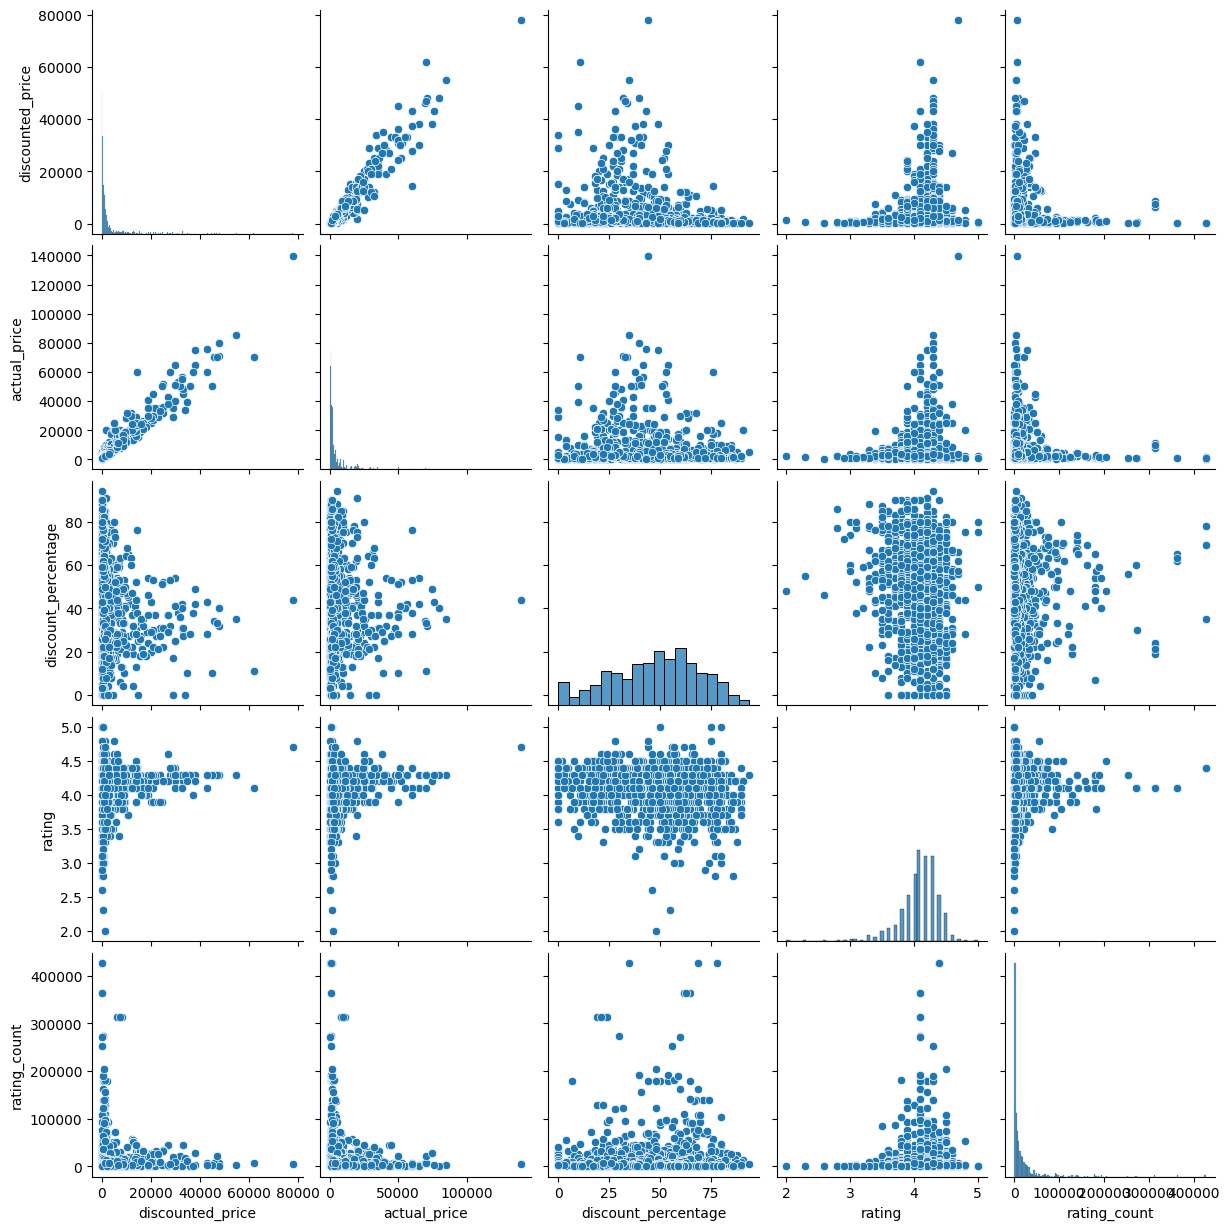

In [45]:
# Summary statistics
features.describe()

# Visualizations
sns.pairplot(features)
plt.show()

Three different clustering models were considered for this analysis. The primary focus was on K-means clustering, but other models such as DBSCAN and hierarchical clustering were also explored.
K-means Clustering

K-means clustering was applied with different numbers of clusters to determine the optimal one using the elbow method.

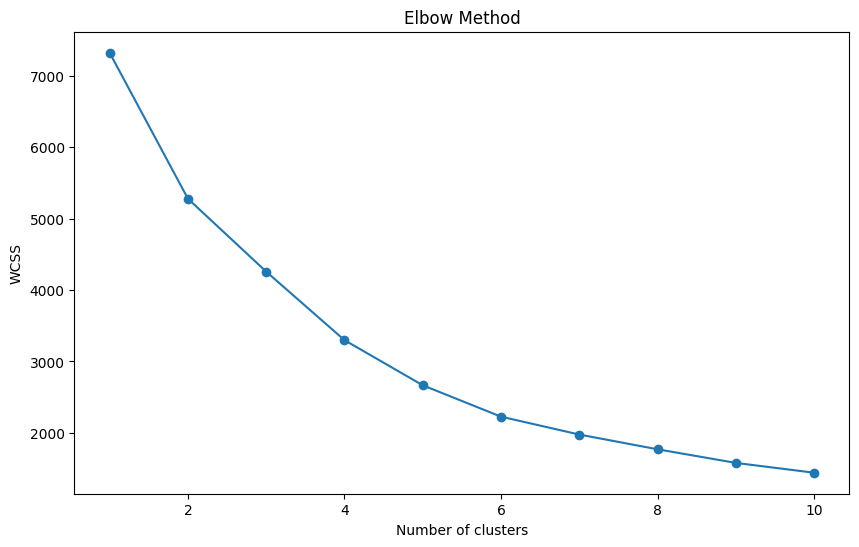

In [46]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


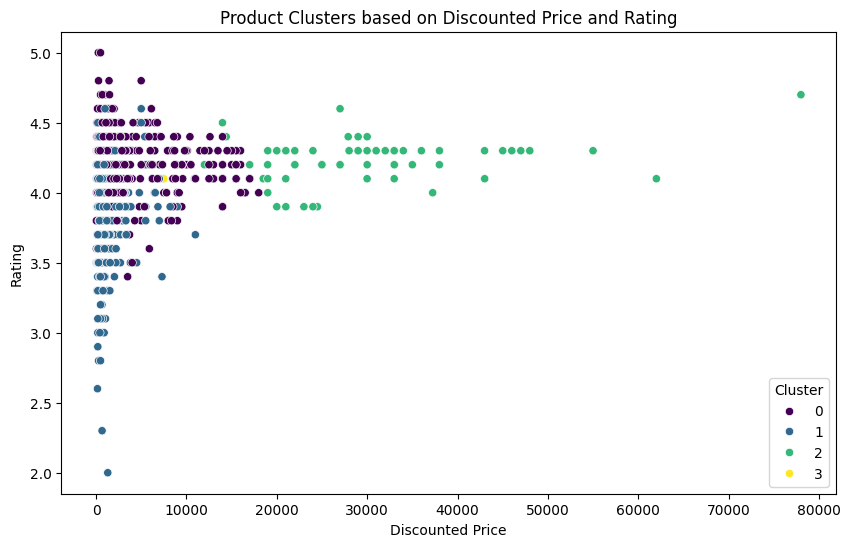

In [47]:
# Apply K-means with the optimal number of clusters
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the original dataset
amazon_data['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='discounted_price', y='rating', hue='Cluster', data=amazon_data, palette='viridis')
plt.title('Product Clusters based on Discounted Price and Rating')
plt.xlabel('Discounted Price')
plt.ylabel('Rating')
plt.show()

In [51]:
# Analyze the characteristics of each cluster
# Exclude non-numeric columns, especially 'product_id'
cluster_summary = amazon_data.groupby('Cluster')[['discounted_price', 'actual_price', 'rating', 'rating_count']].mean() # Changed tuple to list
cluster_summary['count'] = amazon_data['Cluster'].value_counts()
print(cluster_summary)

# Provide actionable insights
print("Cluster Analysis:")
for cluster in cluster_summary.index:
    print(f"\nCluster {cluster}:")
    print(f"Average Discounted Price: {cluster_summary.loc[cluster, 'discounted_price']:.2f}")
    print(f"Average Actual Price: {cluster_summary.loc[cluster, 'actual_price']:.2f}")
    print(f"Average Rating: {cluster_summary.loc[cluster, 'rating']:.2f}")
    print(f"Average Rating Count: {cluster_summary.loc[cluster, 'rating_count']:.2f}")
    print(f"Number of Products: {cluster_summary.loc[cluster, 'count']}")

         discounted_price  actual_price    rating   rating_count  count
Cluster                                                                
0             3162.329227   4721.746854  4.234622   12335.014060    569
1              992.642259   2780.258020  3.982487   12266.388325    788
2            29774.061538  46087.200000  4.229231   11763.553846     65
3             1419.047619   2410.166667  4.161905  221814.690476     42
Cluster Analysis:

Cluster 0:
Average Discounted Price: 3162.33
Average Actual Price: 4721.75
Average Rating: 4.23
Average Rating Count: 12335.01
Number of Products: 569

Cluster 1:
Average Discounted Price: 992.64
Average Actual Price: 2780.26
Average Rating: 3.98
Average Rating Count: 12266.39
Number of Products: 788

Cluster 2:
Average Discounted Price: 29774.06
Average Actual Price: 46087.20
Average Rating: 4.23
Average Rating Count: 11763.55
Number of Products: 65

Cluster 3:
Average Discounted Price: 1419.05
Average Actual Price: 2410.17
Average Rating: 4.

Further Analysis:

    Sentiment Analysis: Perform sentiment analysis on reviews to extract more detailed insights.
    Seasonal Trends: Explore seasonal trends in sales data to adjust marketing strategies accordingly.

Model Improvement:

    Additional Features: Consider additional features like product category and detailed review sentiments.
    Different Clustering Techniques: Use different clustering techniques like DBSCAN and hierarchical clustering for comparison.

Business Application:

    Marketing Strategies: Tailor marketing efforts based on cluster characteristics.
    Inventory Management: Optimize inventory levels according to product popularity and segment.

In [55]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
